# Trying to see how different machine learning techniques perform on a given dataset.
## @author: [Madhav Shekhar Sharma](https://github.com/PseudoCodeNerd/ml-road/tree/master/projects)
### Techniques used:
* KNN's 
* Logistic Regression
* Decision Trees
* Random Forest
* Gradient Boostin
* Neural Networks

### Let's see which one performs the best!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


check for the no. of data points and the features

In [4]:
print("dimensions of data set: {}".format(data.shape))

dimensions of data set: (569, 33)


so, there are 569 data points and 32 features...

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
print(data.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


So, out of 569 data points: 357 are Benign Cells while 212 are Malignant.

In [7]:
#getting info on the data types of the the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
#i'll be dropping the id column, it doesn't seem to do much!
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)


# 1. K-Nearest Neighbours
 The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”<br><br>
 Let’s investigate whether we can confirm the connection between model complexity and accuracy

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'diagnosis'], data['diagnosis'], stratify=data['diagnosis'], random_state=66)


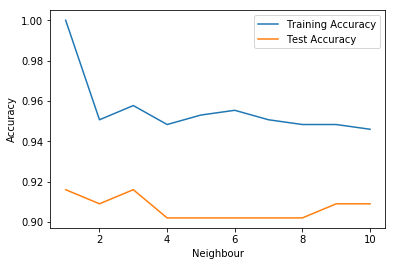

In [11]:
from sklearn.neighbors import KNeighborsClassifier

train_accuracy = []
test_accuracy = []

# lets try n neighbours from 0-10

neighbours = range(1,11)
for n_neighbours in neighbours:
    knn_model1 = KNeighborsClassifier(n_neighbors=n_neighbours)
    knn_model1.fit(X_train,y_train)
    train_accuracy.append(knn_model1.score(X_train,y_train))
    test_accuracy.append(knn_model1.score(X_test,y_test))
    
plt.plot(neighbours, train_accuracy, label="Training Accuracy")
plt.plot(neighbours, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Neighbour")
plt.legend()
plt.savefig('Model1_knn_compare')

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex.

The best performance is somewhere around three neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is more than 90% accuracy, which might still be pretty good.

The above plot suggests that we should shoose n_neighbors=3. Here we are:

In [13]:
knn_model1=KNeighborsClassifier(n_neighbors=3)
knn_model1.fit(X_train,y_train)

print("K-NN Training Set Accuracy: {:.2f}".format(knn_model1.score(X_train,y_train)))
print("K-NN Test Set Accuracy: {:.2f}".format(knn_model1.score(X_test,y_test)))

K-NN Training Set Accuracy: 0.96
K-NN Test Set Accuracy: 0.92


# Nice.